In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import random
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df=pd.read_csv("housing.csv")


In [ ]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [ ]:
df.tail()

,RM,LSTAT,PTRATIO,MEDV
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0
488,6.030,7.88,21.0,249900.0


In [ ]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [ ]:
df.size

1956

In [ ]:
df.shape

(489, 4)

In [ ]:
import pandas as pd
# Check for missing values
df.isnull().sum()

# Fill missing values (if any) with the mean of the column
for col in df.columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())

# Check for duplicate rows
df.duplicated().sum()
# Remove duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Check data types and convert if necessary
df.info()
# Example: convert a column to numeric
# df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')

#Remove Outliers
for col in df.columns:
  if df[col].dtype != 'object':
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


(436, 4)

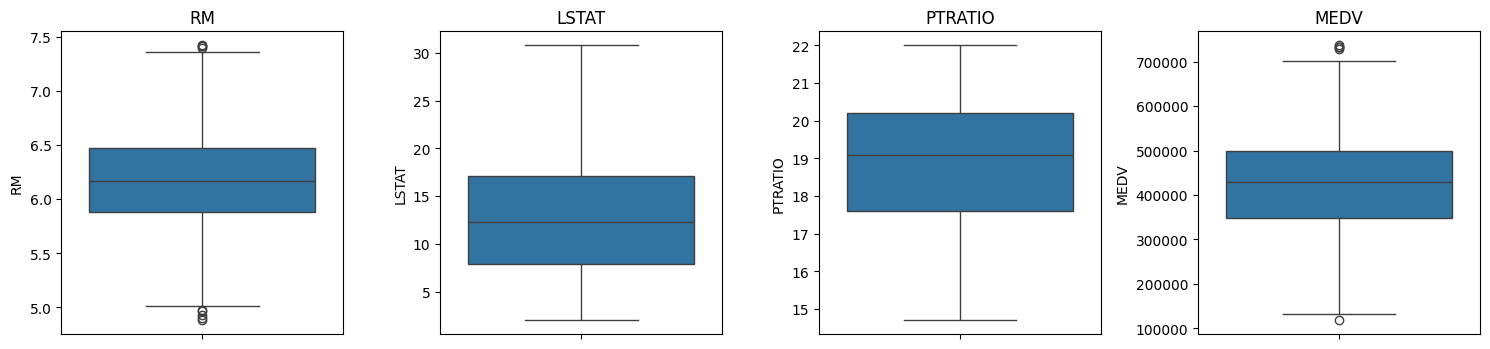

In [ ]:
# prompt: # find outliers using boxplot

# Create box plots for all numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
  if df[col].dtype != 'object':
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:

for col in df.columns:
  if df[col].dtype != 'object':
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


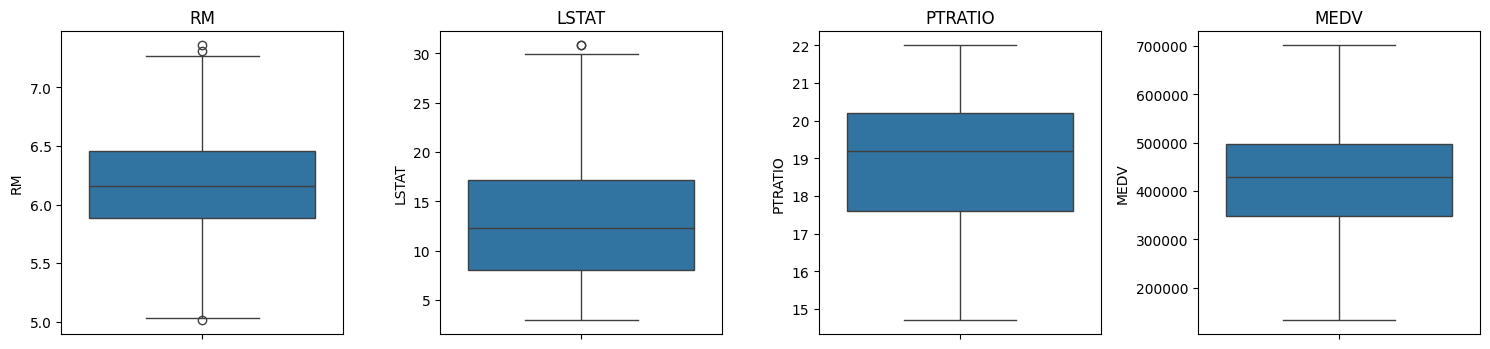

In [ ]:


# Create box plots for all numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
  if df[col].dtype != 'object':
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


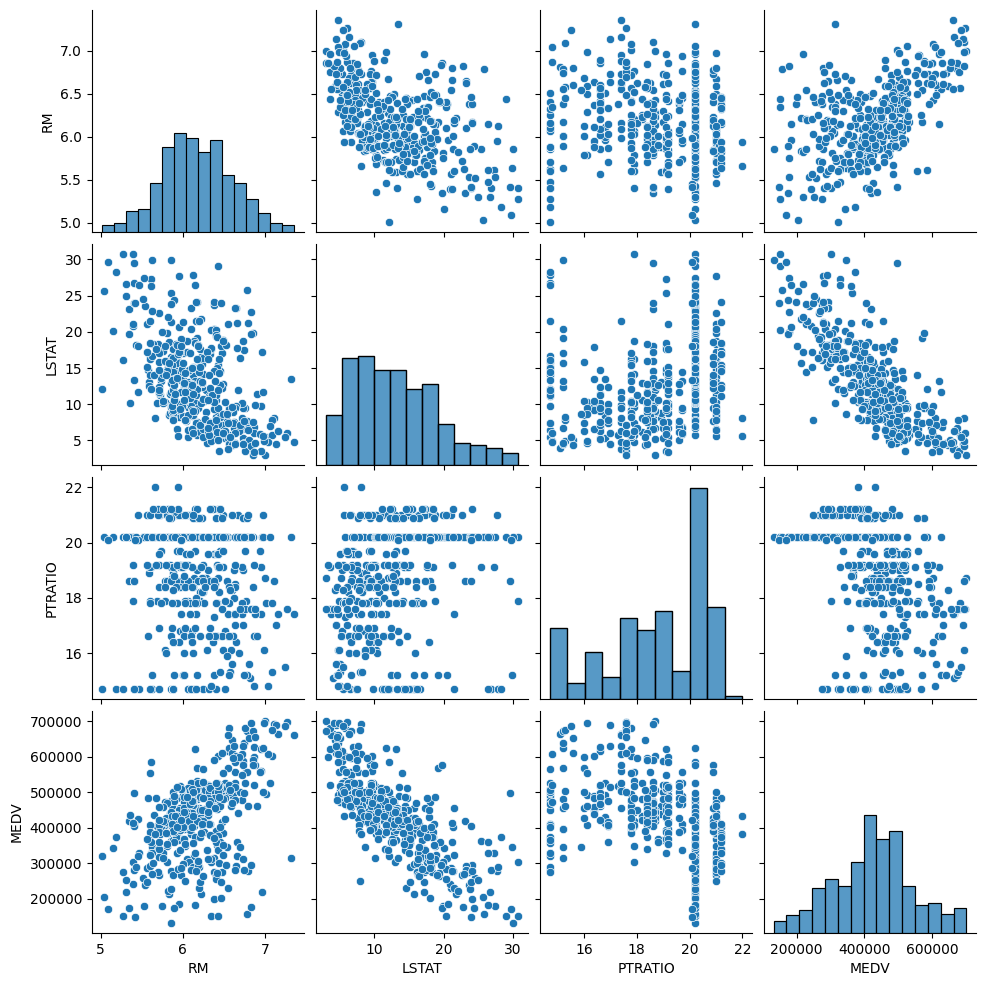

In [ ]:
sns.pairplot(df)

In [ ]:

### LinearRegression.py
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [ ]:
### RandomForest.py
class DecisionTree:
    def __init__(self, depth=0, max_depth=10):
        self.depth = depth
        self.max_depth = max_depth
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.value = None

    def fit(self, X, y):
        if len(set(y)) == 1 or self.depth >= self.max_depth:
            self.value = np.mean(y)
            return

        best_mse = float('inf')
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] <= threshold
                right_indices = X[:, feature_index] > threshold
                if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                    continue

                left_mean = np.mean(y[left_indices])
                right_mean = np.mean(y[right_indices])
                mse = np.mean((y[left_indices] - left_mean) ** 2) + np.mean((y[right_indices] - right_mean) ** 2)

                if mse < best_mse:
                    best_mse = mse
                    self.feature_index = feature_index
                    self.threshold = threshold

        if best_mse == float('inf'):
            self.value = np.mean(y)
            return

        left_indices = X[:, self.feature_index] <= self.threshold
        right_indices = X[:, self.feature_index] > self.threshold
        self.left = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.right = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.left.fit(X[left_indices], y[left_indices])
        self.right.fit(X[right_indices], y[right_indices])

    def predict(self, X):
        if self.value is not None:
            return self.value
        if X[self.feature_index] <= self.threshold:
            return self.left.predict(X)
        else:
            return self.right.predict(X)

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            indices = np.random.choice(len(X), len(X), replace=True)
            X_sample, y_sample = X[indices], y[indices]
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        preds = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(preds, axis=0)


In [ ]:
### Evaluation.py
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('housing.csv')

# Data Preprocessing
def preprocess_data(df):
    df = df.dropna()
    numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_features] = (df[numeric_features] - df[numeric_features].mean()) / df[numeric_features].std()
    return df

df = preprocess_data(df)
X = df.drop(columns=['MEDV'])  # Assuming 'MEDV' is the target column
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

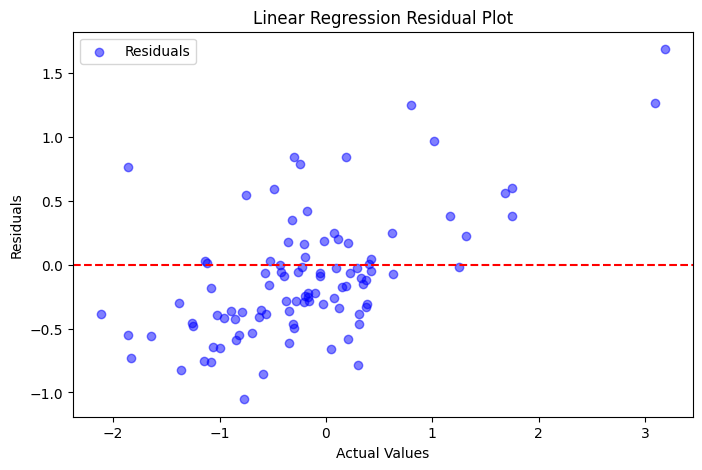

In [ ]:

# Residual Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test - y_pred_lr, color='blue', alpha=0.5, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Linear Regression Residual Plot")
plt.legend()
plt.show()

In [ ]:
# Feature Importance Plot
def plot_feature_importance(feature_importance, feature_names):
    indices = np.argsort(feature_importance)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.bar(range(len(feature_importance)), feature_importance[indices], align="center")
    plt.xticks(range(len(feature_importance)), feature_names[indices], rotation=90)
    plt.show()


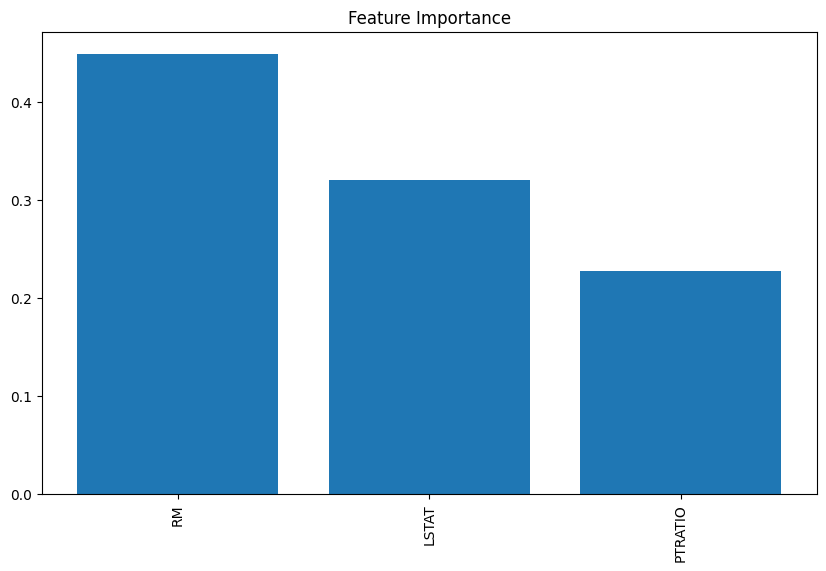

In [ ]:
# Placeholder for Feature Importance Visualization
feature_importance = np.random.rand(X_train.shape[1])  # Replace with actual feature importance calculation
plot_feature_importance(feature_importance, X_train.columns)


In [ ]:
# Train and evaluate models
lin_reg = LinearRegressionGD()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

rf = RandomForest(n_trees=10, max_depth=10)
rf.fit(X_train.values, y_train.values)
y_pred_rf = np.array([rf.predict(x) for x in X_test.values])

print("Linear Regression:")
print(f"RMSE: {rmse(y_test, y_pred_lr)}")
print(f"R² Score: {r2_score(y_test, y_pred_lr)}")

print("Random Forest:")
print(f"RMSE: {rmse(y_test, y_pred_rf)}")
print(f"R² Score: {r2_score(y_test, y_pred_rf)}")

# Placeholder for XGBoost (To be implemented)

# Feature Importance Placeholder
# def plot_feature_importance(feature_importance, feature_names):
#     indices = np.argsort(feature_importance)[::-1]
#     plt.figure(figsize=(10, 6))
#     plt.title("Feature Importance")
#     plt.bar(range(len(feature_importance)), feature_importance[indices], align="center")
#     plt.xticks(range(len(feature_importance)), feature_names[indices], rotation=90)
#     plt.show()

# plot_feature_importance(feature_importance, X_train.columns)


Linear Regression:
RMSE: 0.49840084087665487
R² Score: 0.6910169888691944
Random Forest:
RMSE: 0.577653671681452
R² Score: 0.5849387929285728
